# Codigo antiguo

In [ ]:
from matplotlib import pyplot as plt
from pandas import pandas as pd
ruta="/content/drive/MyDrive/Trabajo de grado/"
archivo_datos1="DATOS_20209050077042 _MET.csv"
archivo_datos2="DATOS_20209050077042 _HID.csv"
archivo_datos3="20209050077022.csv"
archivo_emergencias="emergencias_acontecidas_en_la_ciudad_de_cali_2017.csv"


In [ ]:
datos1=pd.read_csv(str(ruta+archivo_datos1),",")
datos2=pd.read_csv(str(ruta+archivo_datos2),",")
datos3=pd.read_csv(str(ruta+archivo_datos3),",")

emergencias=pd.read_csv(str(ruta+archivo_emergencias),",")

In [ ]:
datos.info(), emergencias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80559 entries, 0 to 80558
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CodigoEstacion    80559 non-null  int64  
 1   NombreEstacion    80559 non-null  object 
 2   Latitud           80559 non-null  float64
 3   Longitud          80559 non-null  float64
 4   Altitud           80559 non-null  int64  
 5   IdParametro       80559 non-null  object 
 6   Etiqueta          80559 non-null  object 
 7   DescripcionSerie  80559 non-null  object 
 8   Frecuencia        80559 non-null  object 
 9   Fecha             80559 non-null  object 
 10  Valor             80559 non-null  float64
 11  Grado             0 non-null      float64
 12  Calificador       0 non-null      float64
 13  NivelAprobacion   80559 non-null  int64  
dtypes: float64(5), int64(3), object(6)
memory usage: 8.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3004 entries, 0 to 3003
Dat

(None, None)

In [ ]:
emergencias['Fecha'] = pd.to_datetime(emergencias['Fecha'].astype(str), format='%m/%d/%Y %H:%M:%S %p')
emergencias['Fecha'] = emergencias['Fecha'].dt.strftime('%Y-%m-%d %H:%M')
emergencias['Fecha'] = pd.to_datetime(emergencias['Fecha'].astype(str), format='%Y-%m-%d %H:%M')
datos['Fecha'] = pd.to_datetime(datos['Fecha'].astype(str), format='%Y-%m-%d %H:%M')

In [ ]:
todo=pd.merge_ordered(datos,emergencias,on="Fecha",how="outer",suffixes=('_dat','_emer'))


In [ ]:
data_precipitacion=todo[(todo['Frecuencia']=='Diaria') & (todo['IdParametro']=='PRECIPITACION')]

In [ ]:
columnas=['NombreEstacion','Latitud','Longitud','Altitud','Valor','Barrio']
data_precipitacion=data_precipitacion[columnas]
data_precipitacion

,NombreEstacion,Latitud,Longitud,Altitud,Valor,Barrio
1,AEROPUERTO A BONILLA [26075040],3.536689,-76.386639,970.0,0.0,NaN
6,AEROPUERTO BUENAVENTUR [53115010],3.820111,-76.992389,28.0,7.7,NaN
7,ALAMBRADO EL-ALERT [26120180],4.409306,-75.875333,171.0,0.0,NaN
8,ALCALA [26120150],4.676472,-75.786306,1261.0,1.9,NaN
9,ARBOLEDA LA [26110290],4.531611,-76.093611,959.0,0.0,NaN
...,...,...,...,...,...,...
83558,QUEREMAL [53100040],3.526250,-76.708889,1523.0,0.0,NaN
83559,UNIVERSIDAD DEL VALLE - AUT [26055120],3.378000,-76.533889,996.0,0.0,NaN
83560,VIJES [26080070],3.698528,-76.429722,974.0,0.0,NaN
83561,VILLA LUZ ALBA [53110130],3.690083,-76.592500,1426.0,0.0,NaN


In [ ]:
corr=todo_clean.corr()

In [ ]:
corr=datos.corr()

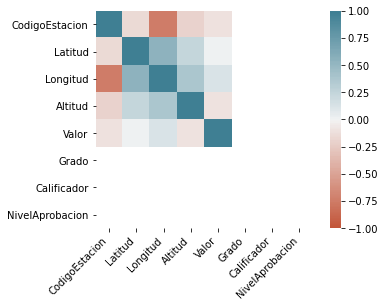

In [ ]:
import seaborn as sns

corr=datos.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
datos_completos=datos[["CodigoEstacion","NombreEstacion","Latitud","Longitud","Altitud","IdParametro","Etiqueta","DescripcionSerie","Frecuencia","Fecha","Valor","NivelAprobacion"]]

In [ ]:
datos_completos=datos_completos.set_index("Fecha")

In [ ]:
# estaciones=datos_completos.iloc[["CodigoEstacion","NombreEstacion","Latitud","Longitud","Altitud"]]
estaciones=datos_completos.iloc[:,0:6]
estaciones=estaciones.reset_index()
estaciones=estaciones.iloc[:,1:]

In [ ]:
estaciones.drop_duplicates(ignore_index=True)

,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,IdParametro
0,26075040,AEROPUERTO A BONILLA [26075040],3.536689,-76.386639,970,TEMPERATURA
1,26075040,AEROPUERTO A BONILLA [26075040],3.536689,-76.386639,970,PRECIPITACION
2,26075040,AEROPUERTO A BONILLA [26075040],3.536689,-76.386639,970,BRILLO SOLAR
3,26075040,AEROPUERTO A BONILLA [26075040],3.536689,-76.386639,970,TENSION VAPOR
4,26075150,AEROPUERTO A.BONILLA - AUT [26075150],3.532992,-76.382500,961,VEL VIENTO
...,...,...,...,...,...,...
125,26110120,VILLA NUEVA [26110120],4.971083,-76.038528,1341,PRECIPITACION
126,53080010,YURUMANGUI S ANTON [53080010],3.260667,-77.259250,21,PRECIPITACION
127,26070110,ZAPATA LA [26070110],3.527194,-76.210833,119,PRECIPITACION
128,26105250,ZARAGOZA - AUT [26105250],4.689778,-75.925194,943,VEL VIENTO


In [ ]:
temperaturas=datos_completos[datos_completos["IdParametro"]=="TEMPERATURA"].reset_index()["Valor"]
precipitacion=datos_completos[datos_completos["IdParametro"]=="PRECIPITACION"].reset_index()["Valor"]
brillo=datos_completos[datos_completos["IdParametro"]=="BRILLO SOLAR"].reset_index()["Valor"]
temperaturas, precipitacion, brillo

(0       18.401882
 1       18.481548
 2       19.215323
 3       19.495556
 4       18.846269
           ...    
 2038    32.228611
 2039    34.199059
 2040    33.445278
 2041    31.702554
 2042    31.115000
 Name: Valor, Length: 2043, dtype: float64, 0         0.0
 1         0.0
 2         0.8
 3         0.0
 4         0.0
          ... 
 72307     8.0
 72308     0.0
 72309    17.0
 72310     5.0
 72311     0.0
 Name: Valor, Length: 72312, dtype: float64, 0      153.6
 1      177.9
 2      131.4
 3      152.4
 4        0.0
        ...  
 252    176.5
 253    156.1
 254    111.5
 255    126.0
 256    154.2
 Name: Valor, Length: 257, dtype: float64)

In [ ]:
# para ordenar por tiempo y rellenar espacios
pd.merge_ordered(data1_____,data2_____,on='date',fill_method="ffill")
# data1.corr() para mirar la correlacion de la variables

NameError: ignored

In [ ]:
estaciones=datos.iloc[:,0:5]
estaciones

,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud
0,26075040,AEROPUERTO A BONILLA [26075040],3.536689,-76.386639,970
1,26075040,AEROPUERTO A BONILLA [26075040],3.536689,-76.386639,970
2,26075040,AEROPUERTO A BONILLA [26075040],3.536689,-76.386639,970
3,26075040,AEROPUERTO A BONILLA [26075040],3.536689,-76.386639,970
4,26075040,AEROPUERTO A BONILLA [26075040],3.536689,-76.386639,970
...,...,...,...,...,...
80554,26100780,ZARZAL [26100780],4.383056,-76.073500,953
80555,26100780,ZARZAL [26100780],4.383056,-76.073500,953
80556,26100780,ZARZAL [26100780],4.383056,-76.073500,953
80557,26100780,ZARZAL [26100780],4.383056,-76.073500,953


In [ ]:
datos.groupby('IdParametro').count()

,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Etiqueta,DescripcionSerie,Frecuencia,Fecha,Valor,Grado,Calificador,NivelAprobacion
IdParametro,,,,,,,,,,,,,
BRILLO SOLAR,257,257,257,257,257,257,257,257,257,257,0,0,257
EVAPORACION,210,210,210,210,210,210,210,210,210,210,0,0,210
HUM RELATIVA,5,5,5,5,5,5,5,5,5,5,0,0,5
PRECIPITACION,72312,72312,72312,72312,72312,72312,72312,72312,72312,72312,0,0,72312
REC VIENTO,5091,5091,5091,5091,5091,5091,5091,5091,5091,5091,0,0,5091
TEMPERATURA,2043,2043,2043,2043,2043,2043,2043,2043,2043,2043,0,0,2043
TENSION VAPOR,224,224,224,224,224,224,224,224,224,224,0,0,224
VEL VIENTO,417,417,417,417,417,417,417,417,417,417,0,0,417


# Precipitación

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from matplotlib import pyplot as plt
from pandas import pandas as pd
ruta="/content/drive/MyDrive/Trabajo de grado/"
archivo_datos1="DATOS_20209050077042 _MET.csv"
archivo_datos2="DATOS_20209050077042 _HID.csv"
archivo_datos3="20209050077022.csv"
archivo_emergencias="emergencias_acontecidas_en_la_ciudad_de_cali_2017.csv"

datos1=pd.read_csv(str(ruta+archivo_datos1),",")
datos2=pd.read_csv(str(ruta+archivo_datos2),",")
datos3=pd.read_csv(str(ruta+archivo_datos3),",")

emergencias=pd.read_csv(str(ruta+archivo_emergencias),",")

## Precipitacion

In [ ]:
datos1.head(), datos2.head(), datos3.head()

(   CodigoEstacion  ... NivelAprobacion
 0        26075040  ...             900
 1        26075040  ...             900
 2        26075040  ...             900
 3        26075040  ...             900
 4        26075040  ...             900
 
 [5 rows x 14 columns],
    CodigoEstacion        NombreEstacion  ...  Calificador  NivelAprobacion
 0        53107040  AGUACLARA [53107040]  ...          NaN              900
 1        53107040  AGUACLARA [53107040]  ...          NaN              900
 2        53107040  AGUACLARA [53107040]  ...          NaN              900
 3        53107040  AGUACLARA [53107040]  ...          NaN              900
 4        53107040  AGUACLARA [53107040]  ...          NaN              900
 
 [5 rows x 14 columns],
    CodigoEstacion  ... NivelAprobacion
 0        26085170  ...             900
 1        26085170  ...             900
 2        26085170  ...             900
 3        26085170  ...             900
 4        26085170  ...             900
 
 [5 rows x

In [ ]:
columnas=['CodigoEstacion','IdParametro','Frecuencia','Fecha','Valor']
datos1 = datos1[columnas]
datos2 = datos2[columnas]
datos3 = datos3[columnas]

In [ ]:
datos_completos=pd.concat([datos1,datos2,datos3])
datos_completos

,CodigoEstacion,IdParametro,Frecuencia,Fecha,Valor
0,26075040,TEMPERATURA,Mensual,2017-01-01 00:00,18.401882
1,26075040,TEMPERATURA,Mensual,2017-02-01 00:00,18.481548
2,26075040,TEMPERATURA,Mensual,2017-03-01 00:00,19.215323
3,26075040,TEMPERATURA,Mensual,2017-04-01 00:00,19.495556
4,26075040,TEMPERATURA,Mensual,2018-05-01 00:00,18.846269
...,...,...,...,...,...
10767,26055120,PRECIPITACION,Diaria,2020-09-10 00:00,0.000000
10768,26055120,PRECIPITACION,Diaria,2020-09-11 00:00,0.000000
10769,26055120,PRECIPITACION,Diaria,2020-09-12 00:00,0.000000
10770,26055120,PRECIPITACION,Diaria,2020-09-13 00:00,0.000000


In [ ]:
datos_completos.set_index('Fecha')

,CodigoEstacion,IdParametro,Frecuencia,Valor
Fecha,,,,
2017-01-01 00:00,26075040,TEMPERATURA,Mensual,18.401882
2017-02-01 00:00,26075040,TEMPERATURA,Mensual,18.481548
2017-03-01 00:00,26075040,TEMPERATURA,Mensual,19.215323
2017-04-01 00:00,26075040,TEMPERATURA,Mensual,19.495556
2018-05-01 00:00,26075040,TEMPERATURA,Mensual,18.846269
...,...,...,...,...
2020-09-10 00:00,26055120,PRECIPITACION,Diaria,0.000000
2020-09-11 00:00,26055120,PRECIPITACION,Diaria,0.000000
2020-09-12 00:00,26055120,PRECIPITACION,Diaria,0.000000


In [ ]:
datos_completos.groupby('DescripcionSerie').count()

KeyError: ignored

In [ ]:
datos_diarios=datos_completos.query('Frecuencia=="Diaria"')
datos_mensuales=datos_completos.query('Frecuencia=="Mensual"')

In [ ]:
datos_diarios['Fecha']=pd.to_datetime(datos_diarios.Fecha)
datos_diarios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106436 entries, 23 to 10771
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   CodigoEstacion  106436 non-null  int64         
 1   IdParametro     106436 non-null  object        
 2   Frecuencia      106436 non-null  object        
 3   Fecha           106436 non-null  datetime64[ns]
 4   Valor           106436 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 4.9+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
datos_diarios.groupby('IdParametro').max()

,CodigoEstacion,Frecuencia,Fecha,Valor
IdParametro,,,,
CAUDAL,54077200,Diaria,2020-09-21,3784.629248
NIVEL,5311700154,Diaria,2020-09-21,1014.187500
PRECIPITACION,54075040,Diaria,2020-09-14,262.000000
REC VIENTO,54075040,Diaria,2020-07-31,105231.000000


In [ ]:
tabla_pivot=pd.pivot_table(datos_diarios,values='Valor', index=['Fecha','CodigoEstacion'],
                    columns=['IdParametro'])

In [ ]:
%load_ext google.colab.data_table

In [ ]:
tabla_pivot.isna().sum()

IdParametro
CAUDAL           85998
NIVEL            78315
PRECIPITACION    13083
REC VIENTO       86196
dtype: int64

In [ ]:
tabla_pivot.fillna(tabla_pivot.median())

IdParametro                    CAUDAL       NIVEL  PRECIPITACION  REC VIENTO
Fecha      CodigoEstacion                                                   
2016-01-01 26080280         98.368750  186.552083            1.0     34137.0
           26080310         98.368750  186.552083            1.1     34137.0
2016-01-02 26080280         98.368750  186.552083            0.0     34137.0
           26080310         98.368750  186.552083            3.1     34137.0
2016-01-03 26080280         98.368750  186.552083            6.0     34137.0
...                               ...         ...            ...         ...
2020-09-21 21237010        706.200300  263.500000            0.0     34137.0
           26127010         32.361538  184.846154            0.0     34137.0
           2611700158       98.368750  133.600000            0.0     34137.0
           2629700151       98.368750   39.600000            0.0     34137.0
           2633700150       98.368750  289.900000            0.0     34137.0

[91287 rows x 4 columns]

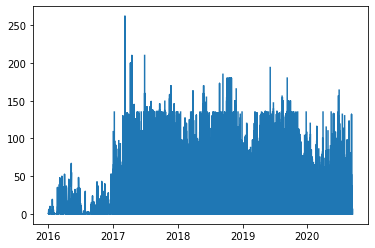

In [ ]:
import matplotlib.pyplot as plt
fig, ax= plt.subplots()

ax.plot(tabla_pivot.reset_index()['Fecha'],tabla_pivot.reset_index()['PRECIPITACION'])
plt.show()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1269f79910>]],
      dtype=object)

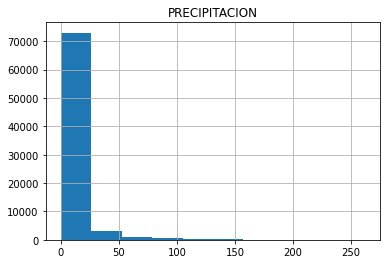

In [ ]:
tabla_pivot.hist(['PRECIPITACION'])

In [ ]:
tabla_pivot_precipitacion=pd.pivot_table(datos_diarios.query('IdParametro == "PRECIPITACION"'),values='Valor', index=['Fecha'],
                    columns=['CodigoEstacion'])

In [ ]:
tabla_pivot_precipitacion

CodigoEstacion,26055100,26055110,26055120,26060020,26070110,26070170,26070760,26075010,26075040,26075080,26080070,26080280,26080290,26080300,26080310,26085160,26085170,26090060,26090460,26090630,26095080,26095320,26100070,26100300,26100350,26100400,26100410,26100690,26100700,26100740,26100770,26100780,26100790,26100800,26100830,26105110,26105140,26105150,26105230,26110040,26110120,26110150,26110160,26110230,26110290,26110300,26115040,26115080,26115090,26120120,26120130,26120150,26120180,26125130,53080010,53090030,53090040,53100040,53110030,53110040,53110100,53110130,53115010,54030010,54030020,54030030,54070030,54075020,54075040
Fecha,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,3.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-10,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-11,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-12,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
tabla_pivot_precipitacion.fillna(0)

CodigoEstacion,26055100,26055110,26055120,26060020,26070110,26070170,26070760,26075010,26075040,26075080,26080070,26080280,26080290,26080300,26080310,26085160,26085170,26090060,26090460,26090630,26095080,26095320,26100070,26100300,26100350,26100400,26100410,26100690,26100700,26100740,26100770,26100780,26100790,26100800,26100830,26105110,26105140,26105150,26105230,26110040,26110120,26110150,26110160,26110230,26110290,26110300,26115040,26115080,26115090,26120120,26120130,26120150,26120180,26125130,53080010,53090030,53090040,53100040,53110030,53110040,53110100,53110130,53115010,54030010,54030020,54030030,54070030,54075020,54075040
Fecha,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,2.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-09-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-09-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


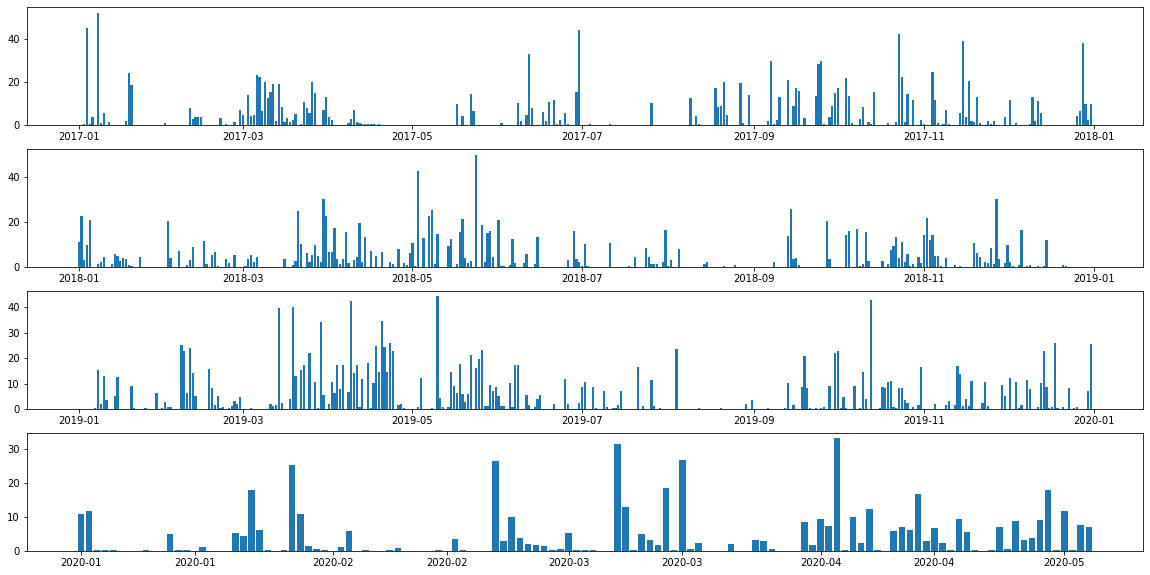

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
fig, axes= plt.subplots(4,1,figsize=(20, 10))

start, end = ['2017','2018','2019','2020'], ['2017','2018','2019','2020']

for i,ax in enumerate(axes):
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
  ax.bar(tabla_pivot_precipitacion[start[i]:end[i]].index,tabla_pivot_precipitacion.loc[start[i]:end[i],26055100])


plt.show()

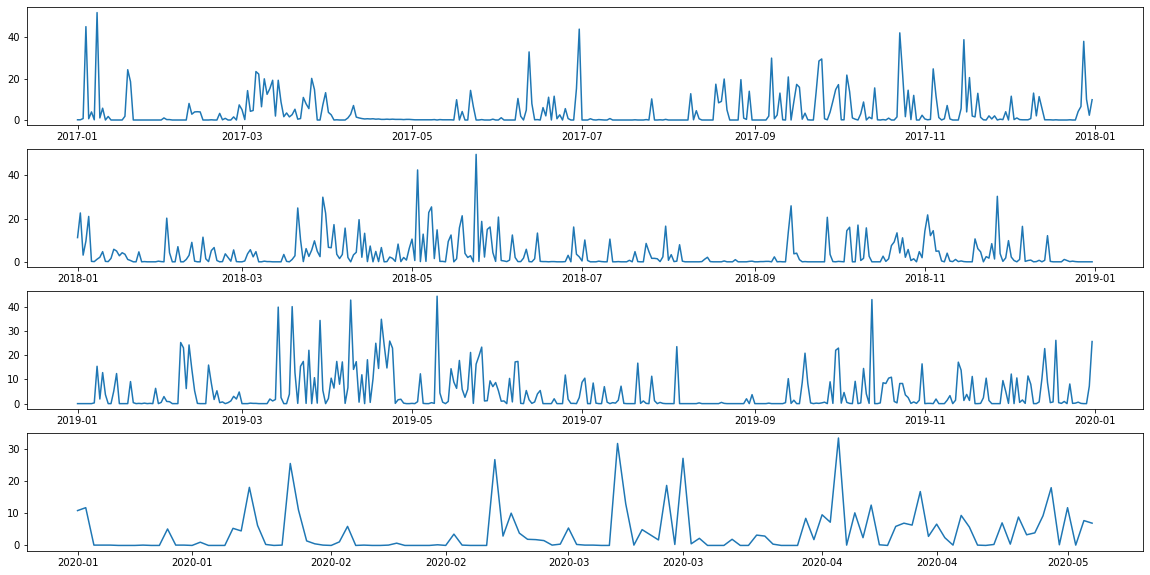

In [ ]:
fig, axes= plt.subplots(4,1,figsize=(20, 10))
start, end = ['2017','2018','2019','2020'], ['2017','2018','2019','2020']

for i,ax in enumerate(axes):
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
  ax.plot(tabla_pivot_precipitacion[start[i]:end[i]].index,tabla_pivot_precipitacion.loc[start[i]:end[i],26055100])

plt.show()

In [ ]:
tabla_pivot_precipitacion.isna().sum()

CodigoEstacion
26055100     499
26055110     874
26055120     322
26060020     375
26070110    1226
            ... 
54030020     372
54030030     455
54070030     750
54075020     520
54075040    1381
Length: 69, dtype: int64

In [ ]:
tabla_pivot_precipitacion.to_csv(r'/content/drive/MyDrive/Trabajo de grado/precipitacion.csv')

In [ ]:
estaciones_cali=[26055100,26080280,26085160,26080300,26055120,26085170,26080310]

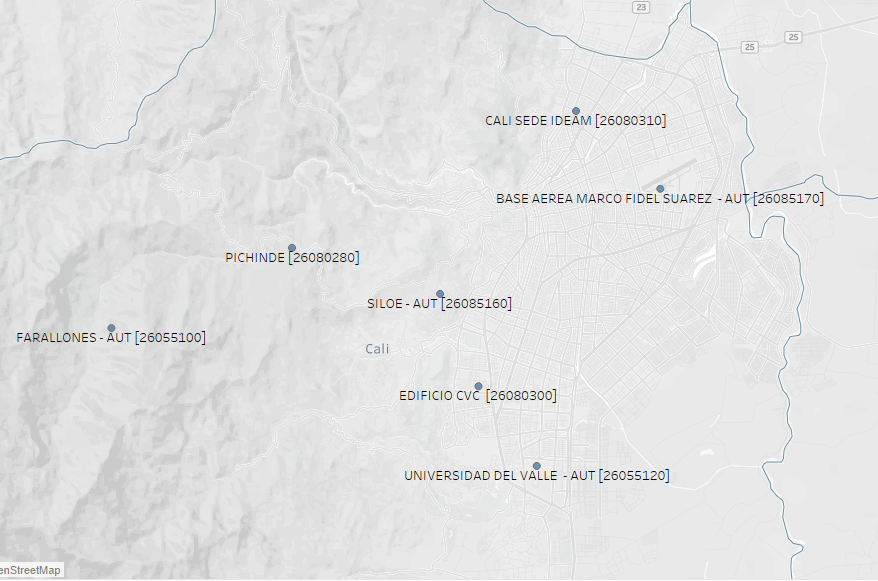

In [ ]:
tabla_pivot_precipitacion_cali=tabla_pivot_precipitacion[estaciones_cali]

In [ ]:
tabla_pivot_precipitacion_cali.isna().sum()

CodigoEstacion
26055100    499
26080280      0
26085160    499
26080300    496
26055120    322
26085170    478
26080310      0
dtype: int64

In [ ]:
tabla_pivot_precipitacion_cali=tabla_pivot_precipitacion_cali.fillna(tabla_pivot_precipitacion_cali.median())

In [ ]:
tabla_pivot_precipitacion_cali

CodigoEstacion,26055100,26080280,26085160,26080300,26055120,26085170,26080310
Fecha,,,,,,,
2016-01-01,0.3,1.0,0.0,0.0,0.166667,0.0,1.1
2016-01-02,0.3,0.0,0.0,0.0,0.166667,0.0,3.1
2016-01-03,0.3,6.0,0.0,0.0,0.166667,0.0,2.2
2016-01-04,0.3,3.0,0.0,0.0,0.166667,0.0,0.0
2016-01-05,0.3,4.0,0.0,0.0,0.166667,0.0,4.0
...,...,...,...,...,...,...,...
2020-09-10,0.3,0.0,0.0,0.0,0.000000,0.0,0.0
2020-09-11,0.3,0.0,0.0,0.0,0.000000,0.0,0.0
2020-09-12,0.3,0.0,0.0,0.0,0.000000,0.0,0.0


In [ ]:
tabla_pivot_precipitacion_cali.to_csv(r'/content/drive/MyDrive/Trabajo de grado/precipitaciones_cali_median.csv')

# Emergencias

In [ ]:
emergencias

NameError: ignored

In [ ]:
emergencias_f = emergencias.query('Tipo_Evento == "Inundacion"')[['Fecha']].drop_duplicates()
emergencias_f = emergencias_f['Fecha'].apply(lambda x: x[:-12])
emergencias_f

In [ ]:
fechas=pd.to_datetime(emergencias_f, format="%m/%d/%Y").to_frame()
fechas['Inundacion']=1
fechas=fechas.reindex().set_index('Fecha')


In [ ]:
fechas

In [ ]:
fechas.to_csv(r'/content/drive/MyDrive/Trabajo de grado/inundaciones_cali.csv')

# Caudal


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from matplotlib import pyplot as plt
from pandas import pandas as pd
ruta="/content/drive/MyDrive/Trabajo de grado/"
 
archivo_caudal="caudal.csv"
 
datos=pd.read_csv(str(ruta+archivo_caudal),";")

## Caudal

In [ ]:
columnas=['CODIGO','VARIABLE ','DIA DEL MES','MES','AÑO','CAUDAL PROMEDIO DIARIOm3/s','MEDIA DEL MES m3/s']

0       ENE
1       ENE
2       ENE
3       ENE
4       ENE
       ... 
8759    DIC
8760    DIC
8761    DIC
8762    DIC
8763    DIC
Name: MES, Length: 8764, dtype: object

In [ ]:
datos_completos = datos[columnas]
d = {'ENE':1, 'FEB':2, 'MAR':3, 'ABR':4, 'MAY':5, 'JUN':6, 'JUL':7, 'AGO':8, 'SEP':9, 'OCT':10, 'NOV':11, 'DIC':12, }
datos_completos.MES=datos_completos.MES.map(d)
print(datos_completos[['AÑO','MES','DIA DEL MES']])
datos_completos['year']=datos_completos['AÑO']
datos_completos['month']=datos_completos['MES']
datos_completos['day']=datos_completos['DIA DEL MES']
datos_completos['Fecha']=pd.to_datetime(datos_completos[['year','month','day']])
datos_completos['CAUDAL PROMEDIO DIARIOm3/s'] = datos_completos['CAUDAL PROMEDIO DIARIOm3/s'].str.replace(',', '').astype(float)
datos_completos['MEDIA DEL MES m3/s'] = datos_completos['MEDIA DEL MES m3/s'].str.replace(',', '').astype(float)
datos_completos.set_index('Fecha')

       AÑO  MES  DIA DEL MES
0     2017    1            1
1     2017    1            2
2     2017    1            3
3     2017    1            4
4     2017    1            5
...    ...  ...          ...
8759  2020   12           27
8760  2020   12           28
8761  2020   12           29
8762  2020   12           30
8763  2020   12           31

[8764 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

,CODIGO,VARIABLE,DIA DEL MES,MES,AÑO,CAUDAL PROMEDIO DIARIOm3/s,MEDIA DEL MES m3/s,year,month,day
Fecha,,,,,,,,,,
2017-01-01,2622420403,NIVEL DE MIRA,1,1,2017,80.0,84.0,2017,1,1
2017-01-02,2622420403,NIVEL DE MIRA,2,1,2017,78.0,84.0,2017,1,2
2017-01-03,2622420403,NIVEL DE MIRA,3,1,2017,76.0,84.0,2017,1,3
2017-01-04,2622420403,NIVEL DE MIRA,4,1,2017,74.0,84.0,2017,1,4
2017-01-05,2622420403,NIVEL DE MIRA,5,1,2017,109.0,84.0,2017,1,5
...,...,...,...,...,...,...,...,...,...,...
2020-12-27,2622320404,NIVEL DE MIRA,27,12,2020,NaN,123.0,2020,12,27
2020-12-28,2622320404,NIVEL DE MIRA,28,12,2020,139.0,123.0,2020,12,28
2020-12-29,2622320404,NIVEL DE MIRA,29,12,2020,117.0,123.0,2020,12,29


In [ ]:
datos_completos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8764 entries, 0 to 8763
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   CODIGO                      8764 non-null   int64         
 1   VARIABLE                    8764 non-null   object        
 2   DIA DEL MES                 8764 non-null   int64         
 3   MES                         8764 non-null   int64         
 4   AÑO                         8764 non-null   int64         
 5   CAUDAL PROMEDIO DIARIOm3/s  7431 non-null   float64       
 6   MEDIA DEL MES m3/s          7939 non-null   float64       
 7   year                        8764 non-null   int64         
 8   month                       8764 non-null   int64         
 9   day                         8764 non-null   int64         
 10  Fecha                       8764 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(7), object(1)
me

In [ ]:
tabla_pivot=pd.pivot_table(datos_completos,values='CAUDAL PROMEDIO DIARIOm3/s', index=['Fecha'],
                    columns=['CODIGO'])
tabla_pivot_media=pd.pivot_table(datos_completos,values='MEDIA DEL MES m3/s', index=['Fecha'],
                    columns=['CODIGO'])

In [ ]:
%load_ext google.colab.data_table

In [ ]:
tabla_pivot

CODIGO,2620000425,2622310403,2622320404,2622330402,2622400401,2622420402,2622420403
Fecha,,,,,,,
2017-01-01,41332.0,47.0,176.0,59.0,312.0,90.0,80.0
2017-01-02,38270.0,45.0,182.0,58.0,292.0,86.0,78.0
2017-01-03,34615.0,44.0,162.0,58.0,275.0,86.0,76.0
2017-01-04,31242.0,46.0,220.0,58.0,444.0,86.0,74.0
2017-01-05,28295.0,44.0,203.0,58.0,379.0,97.0,109.0
...,...,...,...,...,...,...,...
2020-12-27,47233.0,NaN,NaN,NaN,NaN,NaN,2392.0
2020-12-28,36394.0,NaN,139.0,NaN,NaN,NaN,3304.0
2020-12-29,38441.0,NaN,117.0,NaN,NaN,NaN,2705.0


In [ ]:
tabla_pivot.fillna(tabla_pivot_media)

CODIGO,2620000425,2622310403,2622320404,2622330402,2622400401,2622420402,2622420403
Fecha,,,,,,,
2017-01-01,41332.0,47.0,176.0,59.0,312.0,90.0,80.0
2017-01-02,38270.0,45.0,182.0,58.0,292.0,86.0,78.0
2017-01-03,34615.0,44.0,162.0,58.0,275.0,86.0,76.0
2017-01-04,31242.0,46.0,220.0,58.0,444.0,86.0,74.0
2017-01-05,28295.0,44.0,203.0,58.0,379.0,97.0,109.0
...,...,...,...,...,...,...,...
2020-12-27,47233.0,NaN,123.0,NaN,NaN,NaN,2392.0
2020-12-28,36394.0,NaN,139.0,NaN,NaN,NaN,3304.0
2020-12-29,38441.0,NaN,117.0,NaN,NaN,NaN,2705.0


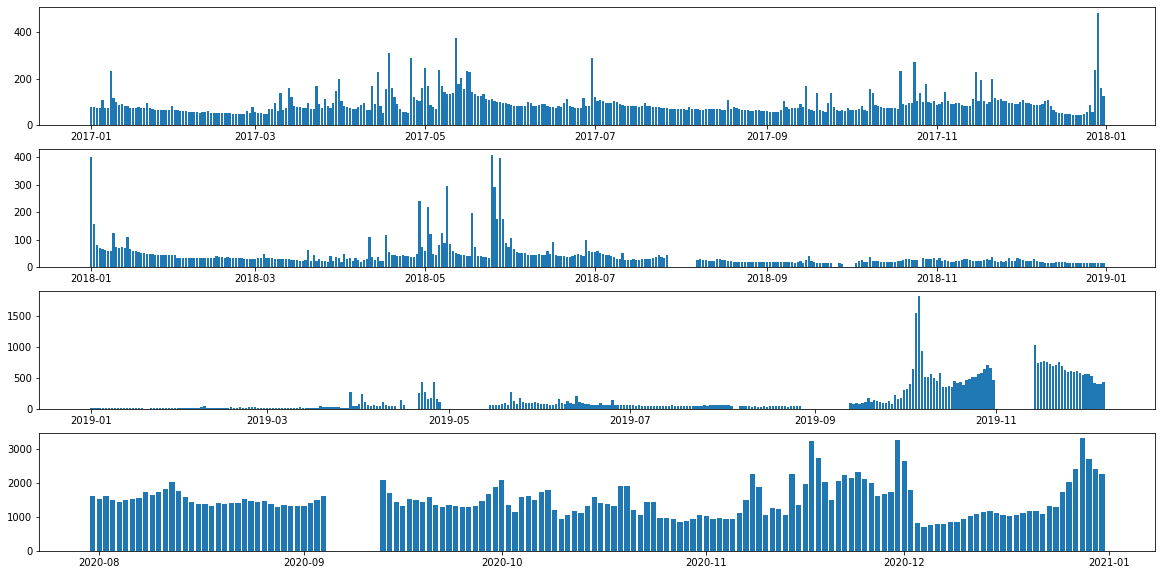

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
fig, axes= plt.subplots(4,1,figsize=(20, 10))

start, end = ['2017','2018','2019','2020'], ['2017','2018','2019','2020']

for i,ax in enumerate(axes):
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
  ax.bar(tabla_pivot[start[i]:end[i]].index,tabla_pivot.loc[start[i]:end[i],2622420403])

plt.show()

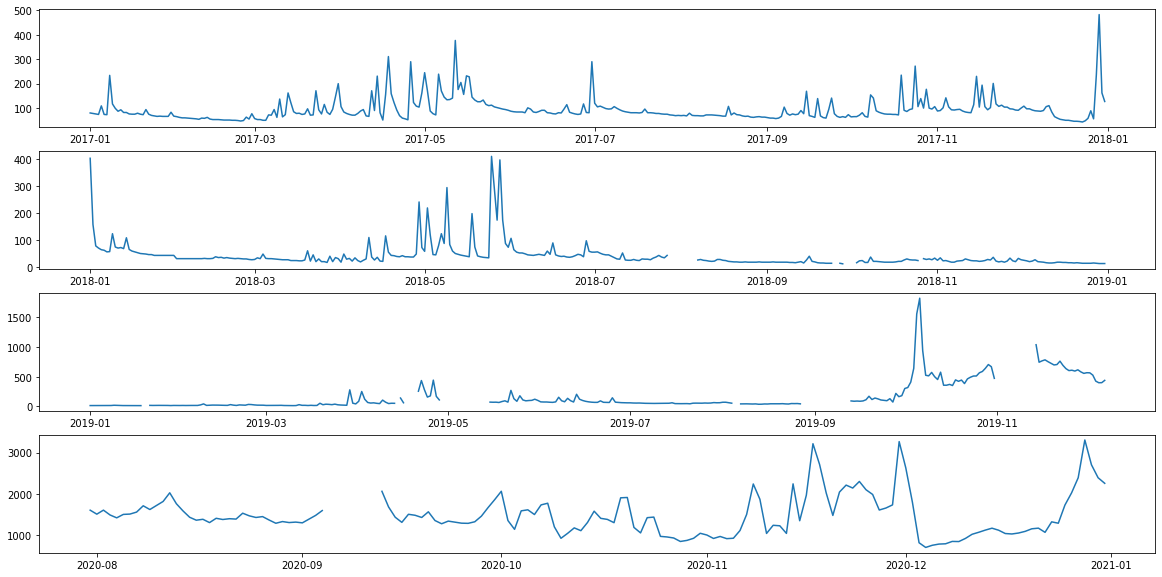

In [ ]:
fig, axes= plt.subplots(4,1,figsize=(20, 10))
start, end = ['2017','2018','2019','2020'], ['2017','2018','2019','2020']

for i,ax in enumerate(axes):
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
  ax.plot(tabla_pivot[start[i]:end[i]].index,tabla_pivot.loc[start[i]:end[i],2622420403])

plt.show()

In [ ]:
tabla_pivot.isna().sum()

CODIGO
2620000425      6
2622310403    607
2622320404    301
2622330402    591
2622400401     45
2622420402    931
2622420403    315
dtype: int64

In [ ]:
tabla_pivot.to_csv(r'/content/drive/MyDrive/Trabajo de grado/caudal_etl.csv')

# Precipitación Horas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from matplotlib import pyplot as plt
from pandas import pandas as pd
ruta="/content/drive/MyDrive/Trabajo de grado/"

archivo_precipitacion="datos_hora.csv"
 
datos=pd.read_csv(str(ruta+archivo_precipitacion),",")

## Precipitacion

In [ ]:
columnas=['CodigoEstacion','IdParametro','Frecuencia','Fecha','Valor']
datos_completos = datos[columnas]

In [ ]:
datos_completos.set_index('Fecha')

,CodigoEstacion,IdParametro,Frecuencia,Valor
Fecha,,,,
2016-12-31 15:00,26085170,PRECIPITACION,Horaria,0.0
2016-12-31 16:00,26085170,PRECIPITACION,Horaria,0.0
2016-12-31 17:00,26085170,PRECIPITACION,Horaria,0.0
2016-12-31 18:00,26085170,PRECIPITACION,Horaria,0.0
2016-12-31 19:00,26085170,PRECIPITACION,Horaria,0.0
...,...,...,...,...
2020-06-30 19:00,26055120,PRECIPITACION,Horaria,0.0
2020-06-30 20:00,26055120,PRECIPITACION,Horaria,0.0
2020-06-30 21:00,26055120,PRECIPITACION,Horaria,0.0


In [ ]:
datos_diarios=datos_completos.query('Frecuencia=="Horaria"')

In [ ]:
datos_diarios['Fecha']=pd.to_datetime(datos_diarios.Fecha)
datos_diarios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121237 entries, 0 to 121236
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   CodigoEstacion  121237 non-null  int64         
 1   IdParametro     121237 non-null  object        
 2   Frecuencia      121237 non-null  object        
 3   Fecha           121237 non-null  datetime64[ns]
 4   Valor           121237 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 5.5+ MB


In [ ]:
datos_diarios.groupby('IdParametro').max()

,CodigoEstacion,Frecuencia,Fecha,Valor
IdParametro,,,,
PRECIPITACION,26085170,Horaria,2020-06-30 23:00:00,45.2


In [ ]:
tabla_pivot=pd.pivot_table(datos_diarios,values='Valor', index=['Fecha','CodigoEstacion'],
                    columns=['IdParametro'])

In [ ]:
%load_ext google.colab.data_table

In [ ]:
tabla_pivot.isna().sum()

IdParametro
PRECIPITACION    0
dtype: int64

In [ ]:
tabla_pivot.fillna(tabla_pivot.median())

IdParametro                         PRECIPITACION
Fecha               CodigoEstacion               
2016-12-31 15:00:00 26055100                  0.0
                    26085160                  0.0
                    26085170                  0.0
2016-12-31 16:00:00 26055100                  0.1
                    26085160                  0.0
...                                           ...
2020-06-30 22:00:00 26055120                  0.0
                    26085170                  0.0
2020-06-30 23:00:00 26055100                  0.0
                    26055120                  0.0
                    26085170                  0.0

[121237 rows x 1 columns]

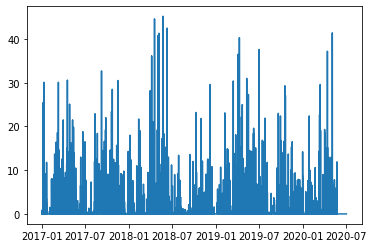

In [ ]:
import matplotlib.pyplot as plt
fig, ax= plt.subplots()

ax.plot(tabla_pivot.reset_index()['Fecha'],tabla_pivot.reset_index()['PRECIPITACION'])
plt.show()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4b325b710>]],
      dtype=object)

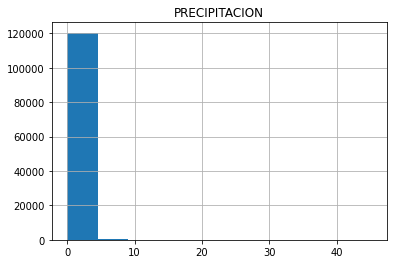

In [ ]:
tabla_pivot.hist(['PRECIPITACION'])

In [ ]:
tabla_pivot_precipitacion=pd.pivot_table(datos_diarios.query('IdParametro == "PRECIPITACION"'),values='Valor', index=['Fecha'],
                    columns=['CodigoEstacion'])

In [ ]:
tabla_pivot_precipitacion

CodigoEstacion,26055100,26055120,26085160,26085170
Fecha,,,,
2016-12-31 15:00:00,0.0,NaN,0.0,0.0
2016-12-31 16:00:00,0.1,NaN,0.0,0.0
2016-12-31 17:00:00,0.0,0.7,0.0,0.0
2016-12-31 18:00:00,0.0,0.4,0.0,0.0
2016-12-31 19:00:00,0.0,0.3,0.0,0.0
...,...,...,...,...
2020-06-30 19:00:00,0.0,0.0,NaN,0.0
2020-06-30 20:00:00,0.0,0.0,NaN,0.0
2020-06-30 21:00:00,0.0,0.0,NaN,0.0


In [ ]:
tabla_pivot_precipitacion.fillna(0)

CodigoEstacion,26055100,26055120,26085160,26085170
Fecha,,,,
2016-12-31 15:00:00,0.0,0.0,0.0,0.0
2016-12-31 16:00:00,0.1,0.0,0.0,0.0
2016-12-31 17:00:00,0.0,0.7,0.0,0.0
2016-12-31 18:00:00,0.0,0.4,0.0,0.0
2016-12-31 19:00:00,0.0,0.3,0.0,0.0
...,...,...,...,...
2020-06-30 19:00:00,0.0,0.0,0.0,0.0
2020-06-30 20:00:00,0.0,0.0,0.0,0.0
2020-06-30 21:00:00,0.0,0.0,0.0,0.0


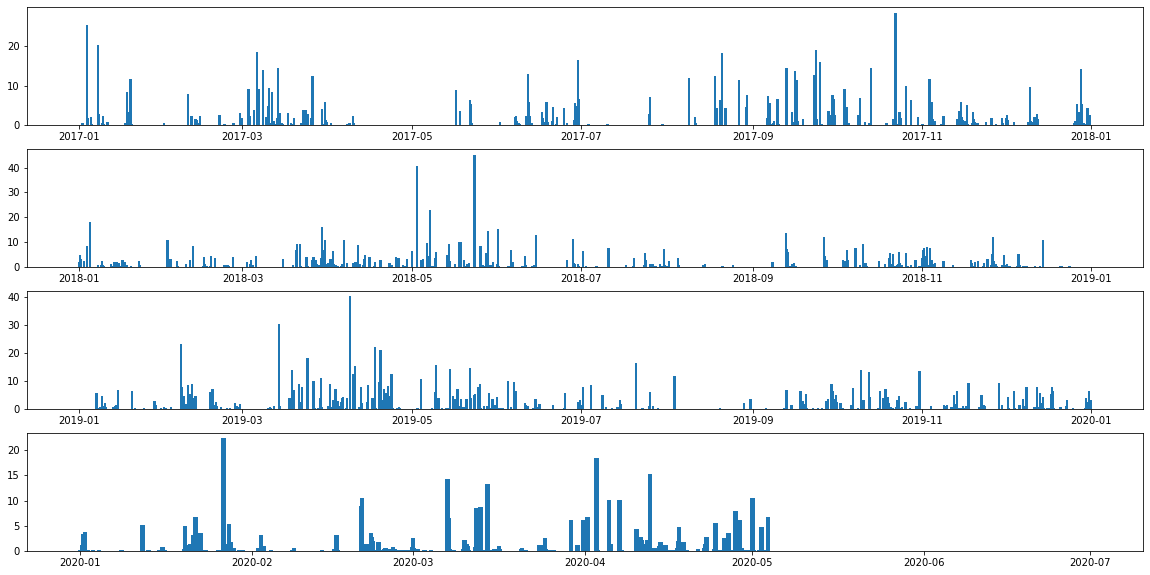

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
fig, axes= plt.subplots(4,1,figsize=(20, 10))

start, end = ['2017','2018','2019','2020'], ['2017','2018','2019','2020']

for i,ax in enumerate(axes):
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
  ax.bar(tabla_pivot_precipitacion[start[i]:end[i]].index,tabla_pivot_precipitacion.loc[start[i]:end[i],26055100])


plt.show()

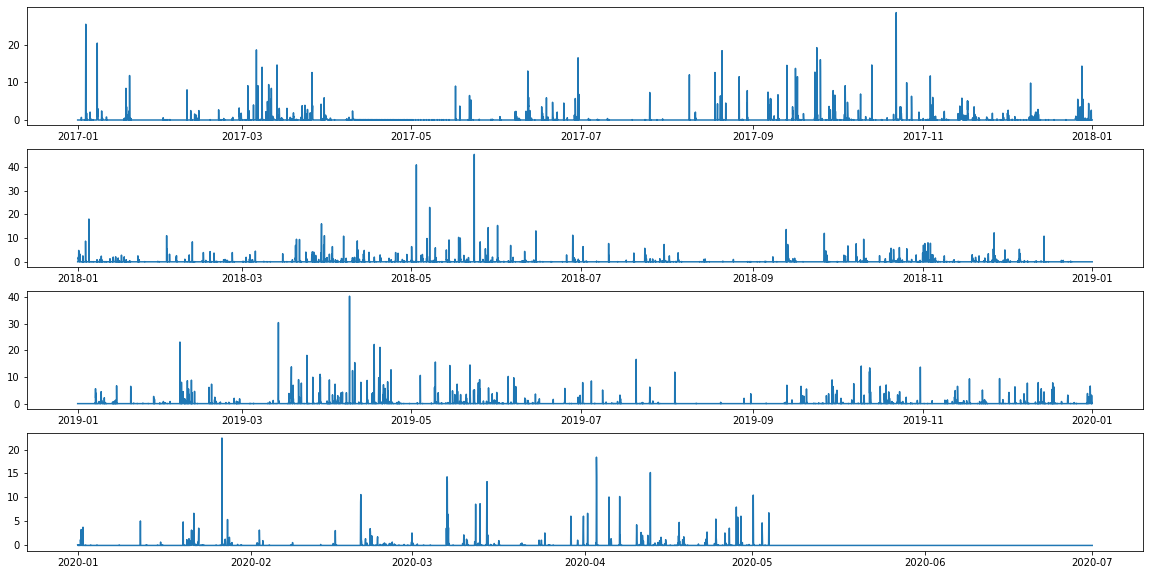

In [ ]:
fig, axes= plt.subplots(4,1,figsize=(20, 10))
start, end = ['2017','2018','2019','2020'], ['2017','2018','2019','2020']

for i,ax in enumerate(axes):
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
  ax.plot(tabla_pivot_precipitacion[start[i]:end[i]].index,tabla_pivot_precipitacion.loc[start[i]:end[i],26055100])

plt.show()

In [ ]:
tabla_pivot_precipitacion=tabla_pivot_precipitacion.fillna(0)

In [ ]:
tabla_pivot_precipitacion.to_csv(r'/content/drive/MyDrive/Trabajo de grado/precipitaciones_hora_cali_zero.csv')

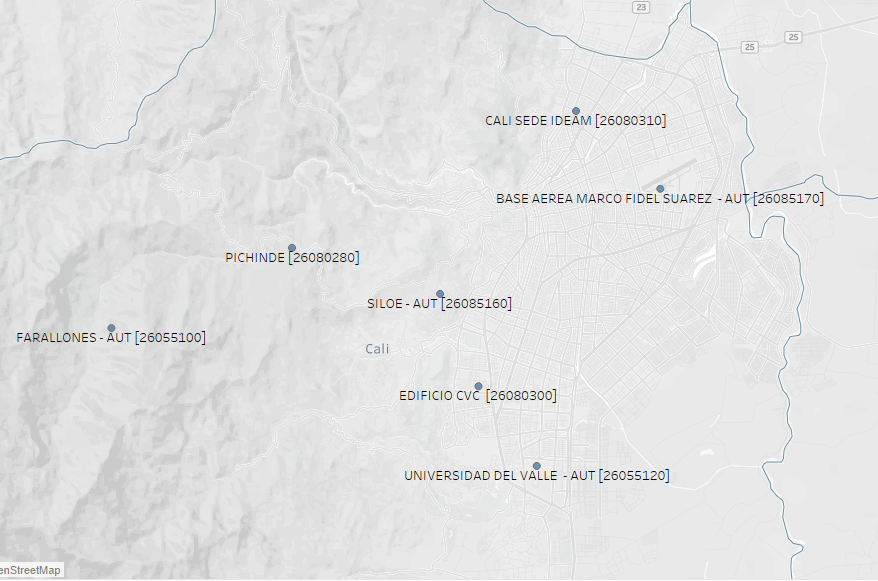

# Datos Precipitacion con inundaciones


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from matplotlib import pyplot as plt
from pandas import pandas as pd
precipitaciones=pd.read_csv('/content/drive/MyDrive/Trabajo de grado/precipitaciones_hora_cali_zero.csv')
inundaciones=pd.read_csv('/content/drive/MyDrive/Trabajo de grado/inundaciones_cali.csv')

df=pd.merge(precipitaciones,inundaciones,on="Fecha",how="left",).fillna(0)
df["Fecha"]= pd.to_datetime(df["Fecha"])

In [ ]:
df = df.set_index('Fecha')
df

,26055100,26055120,26085160,26085170,Inundacion
Fecha,,,,,
2016-12-31 15:00:00,0.0,0.0,0.0,0.0,0.0
2016-12-31 16:00:00,0.1,0.0,0.0,0.0,0.0
2016-12-31 17:00:00,0.0,0.7,0.0,0.0,0.0
2016-12-31 18:00:00,0.0,0.4,0.0,0.0,0.0
2016-12-31 19:00:00,0.0,0.3,0.0,0.0,0.0
...,...,...,...,...,...
2020-06-30 19:00:00,0.0,0.0,0.0,0.0,0.0
2020-06-30 20:00:00,0.0,0.0,0.0,0.0,0.0
2020-06-30 21:00:00,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.to_csv(r'/content/drive/MyDrive/Trabajo de grado/datos_entrenar.csv')

#Datos inundaciones por hora

In [7]:
from matplotlib import pyplot as plt
from pandas import pandas as pd

In [15]:
datos_completos=pd.read_csv('datos_entrenar.csv')
datos=datos_completos.query('Inundacion > 0')[['Fecha','Inundacion']]
datos = datos.set_index('Fecha')
datos.to_csv(r'inundaciones_hora.csv')
datos

,Inundacion
Fecha,
2017-01-08 00:00:00,1.0
2017-01-08 01:00:00,1.0
2017-03-06 07:00:00,1.0
2017-03-06 20:00:00,1.0
2017-03-08 06:00:00,1.0
...,...
2020-04-15 18:00:00,1.0
2020-04-17 21:00:00,1.0
2020-04-17 22:00:00,1.0
